# Week 2: Exploratory Data Analysis (EDA)



## This Week's Content
This week, we will be doing some EDA on our datasets to clean up the data a little bit and understand a bit more of what we are looking at. We will combine the years into one comprehensible dataset and explore the correlations between certain features and their corresponding happiness scores.

### Relevant Libraries (Read the Short Summary if any are new to you)
[pandas](https://pandas.pydata.org/): a fast, powerful, flexible and easy to use open source data analysis and manipulation tool built on top of the Python programming language. It is one of the most common libraries used in data analysis and we will primarily be using the pandas DataFrame to manipulate our data.

[numpy](https://numpy.org/): the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

[matplotlib](https://matplotlib.org/): a comprehensive library for creating static, animated, and interactive visualizations in Python. Many of the matplotlib functions are built into pandas DataFrames, so we will likely not have to call them directly.

[seaborn](https://seaborn.pydata.org/): Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [1]:
# Uncomment and run the lines below if the code below causes an issue, you may need to download some of these pkgs
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Next, we will load in the data from all five years of the World Happiness Report.

In [2]:
whr_2015 = pd.read_csv('https://github.com/shalindb/world_happiness_report/blob/main/data/WHR_2015.csv?raw=true')
whr_2016 = pd.read_csv('https://github.com/shalindb/world_happiness_report/blob/main/data/WHR_2016.csv?raw=true')
whr_2017 = pd.read_csv('https://github.com/shalindb/world_happiness_report/blob/main/data/WHR_2017.csv?raw=true')
whr_2018 = pd.read_csv('https://github.com/shalindb/world_happiness_report/blob/main/data/WHR_2018.csv?raw=true')
whr_2019 = pd.read_csv('https://github.com/shalindb/world_happiness_report/blob/main/data/WHR_2019.csv?raw=true')

Often, we will find that there is little to no consistency in column names for datasets over a long time period. If you look below, you will see that this stuff is a bit of a mess, so we're gonna have to clean it up a bit before we can do anything more : (

In [3]:
whr_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [4]:
whr_2016.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [5]:
whr_2017.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

In [6]:
whr_2018.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [7]:
whr_2019.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

Well, that's a mess. Let's try to make them all consistent and then put them into one dataset, yeah? I'll go ahead and do 2015 - 2018 and you can do 2019! Our goal is to use the columns from the 2015 iteration of the World Happiness Report (except Standard Error).

In [8]:
whr_2015['Year'] = '2015'
whr_2016['Year'] = '2016'
whr_2017['Year'] = '2017'
whr_2018['Year'] = '2018'
whr_2019['Year'] = '2019'
whr_2015 = whr_2015.drop(columns=['Standard Error'])
whr_2016 = whr_2016.drop(columns=['Lower Confidence Interval',
                                  'Upper Confidence Interval'])

# tell me who made the column names for 2017, i just wanna talk
whr_2017 = whr_2017.rename(columns={'Happiness.Rank': 'Happiness Rank',
                                   'Happiness.Score': 'Happiness Score',
                                   'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                                   'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                                   'Trust..Government.Corruption.': 'Trust (Government Corruption)',
                                   'Dystopia.Residual': 'Dystopia Residual'}).drop(columns=['Whisker.high', 'Whisker.low'])
# i wish i could tell you why they decided to do 'country or region' randomly in 2018 and 2019
# maybe they forgot countries are not regions idk
whr_2018 = whr_2018.rename(columns={'Overall rank': 'Happiness Rank',
                                   'Country or region': 'Country',
                                   'Score': 'Happiness Score',
                                   'GDP per capita': 'Economy (GDP per Capita)',
                                   'Social support': 'Family',
                                   'Healthy life expectancy': 'Health (Life Expectancy)',
                                   'Freedom to make life choices': 'Freedom',
                                   'Perceptions of corruption': 'Trust (Government Corruption)'})
# HAVE THEM DO WHR 2019 BY THEMSELVES
whr_2019 = whr_2019.rename(columns={'Overall rank': 'Happiness Rank',
                                   'Country or region': 'Country',
                                   'Score': 'Happiness Score',
                                   'GDP per capita': 'Economy (GDP per Capita)',
                                   'Social support': 'Family',
                                   'Healthy life expectancy': 'Health (Life Expectancy)',
                                   'Freedom to make life choices': 'Freedom',
                                   'Perceptions of corruption': 'Trust (Government Corruption)'})

Now you can go ahead and merge them into one big, beautiful dataset. 

*Hint: This should only take one line of code*

In [9]:
merged = pd.concat([whr_2015, whr_2016, whr_2017, whr_2018, whr_2019])
merged

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,NaN,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,2019
152,Tanzania,NaN,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,2019
153,Afghanistan,NaN,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,2019
154,Central African Republic,NaN,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,2019


You may notice that the Region value for countries in 2018 and 2019 is NaN. This is because they apparently just gave up on adding that information, so I made it part of this EDA section to fix it! Below, I've written a lil' function to take in a country name and return its region. This is a bit of a challenging one, but I want you to use that function to fix all the NaN's in Region to be the correct region.

In [10]:
def region(country):
    """ Simply getting the country's region from the 2015 dataset since it was labeled in that one """
    region_name = ''
    try:
        region_name = list(whr_2015.loc[whr_2015['Country'] == country]['Region'])[0]
        return region_name
    except IndexError:
        print(f'{country} is not present in other datasets')
        return ''

In [11]:
# HAVE THEM DO THIS PART THEMSELVES
merged['Region'] = merged.apply(lambda row: region(row['Country']), axis=1)
merged

Puerto Rico is not present in other datasets
Belize is not present in other datasets
Somalia is not present in other datasets
Somaliland Region is not present in other datasets
Namibia is not present in other datasets
South Sudan is not present in other datasets
Taiwan Province of China is not present in other datasets
Belize is not present in other datasets
Hong Kong S.A.R., China is not present in other datasets
Somalia is not present in other datasets
Namibia is not present in other datasets
South Sudan is not present in other datasets
Trinidad & Tobago is not present in other datasets
Belize is not present in other datasets
Northern Cyprus is not present in other datasets
Somalia is not present in other datasets
Namibia is not present in other datasets
South Sudan is not present in other datasets
Trinidad & Tobago is not present in other datasets
Northern Cyprus is not present in other datasets
North Macedonia is not present in other datasets
Somalia is not present in other dataset

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,Sub-Saharan Africa,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,2019
152,Tanzania,Sub-Saharan Africa,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,2019
153,Afghanistan,Southern Asia,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,2019
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,2019


It's important to note here that in a situation like this, it might be the efficient method to simply drop the countries who didn't have an easily assigned region, but these are entire countries we are talking about. We can't exlude these people from our analyses, and so we will do our best to include them by finding the regions they are in. In the code below, fill in the blanks to finish off our region-fixing-extravaganza.

In [12]:
# List of valid regions
whr_2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [13]:
# I did the first few for you
merged.loc[merged['Country'] == 'Puerto Rico', 'Region'] = 'Latin America and Caribbean'
merged.loc[merged['Country'] == 'Belize', 'Region'] = 'Latin America and Caribbean'
merged.loc[merged['Country'] == 'Somalia', 'Region'] = 'Sub-Saharan Africa'
merged.loc[merged['Country'] == 'Somaliland Region', 'Region'] = 'Sub-Saharan Africa'
merged.loc[merged['Country'] == 'Namibia', 'Region'] = 'Sub-Saharan Africa'
merged.loc[merged['Country'] == 'South Sudan', 'Region'] = 'Sub-Saharan Africa'
merged.loc[merged['Country'] == 'Taiwan Province of China', 'Region'] = 'Eastern Asia'
# Go ahead and do the last 5, shouldn't take too long! Google is your friend :)
merged.loc[merged['Country'] == 'Hong Kong S.A.R., China', 'Region'] = 'Eastern Asia'
merged.loc[merged['Country'] == 'Trinidad & Tobago', 'Region'] = 'Latin America and Caribbean'
merged.loc[merged['Country'] == 'Northern Cyprus', 'Region'] = 'Central and Eastern Europe'
merged.loc[merged['Country'] == 'North Macedonia', 'Region'] = 'Central and Eastern Europe'
merged.loc[merged['Country'] == 'Gambia', 'Region'] = 'Sub-Saharan Africa'

Yeah, I get it. It might seem like busy work putting in the regions for these countries, but I have a reason for it (I swear, I don't hate you). It's important for us to take a step beyond what might be the most efficient or effective solution to our problem and understand what the *best* solution actually is. In this case, it would've been easy and saved time had we ignored all these countries and simply removed them from our dataset. However, if we're measuring something like happiness and seeking to make policymaking decisions, every country and person matters.

We also want to get rid of any other NaN values in other columns that may prevent sound analysis in the future. [Here](https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/) is a link to do so (this should be very easy, do not overthink it)

In [14]:
merged = merged.fillna(0)

Now that you guys finished that last, undoubtedly grueling task, we will finish off the week of EDA by plotting a correlation matrix to understand the correlations between our various features and our happiness scores.

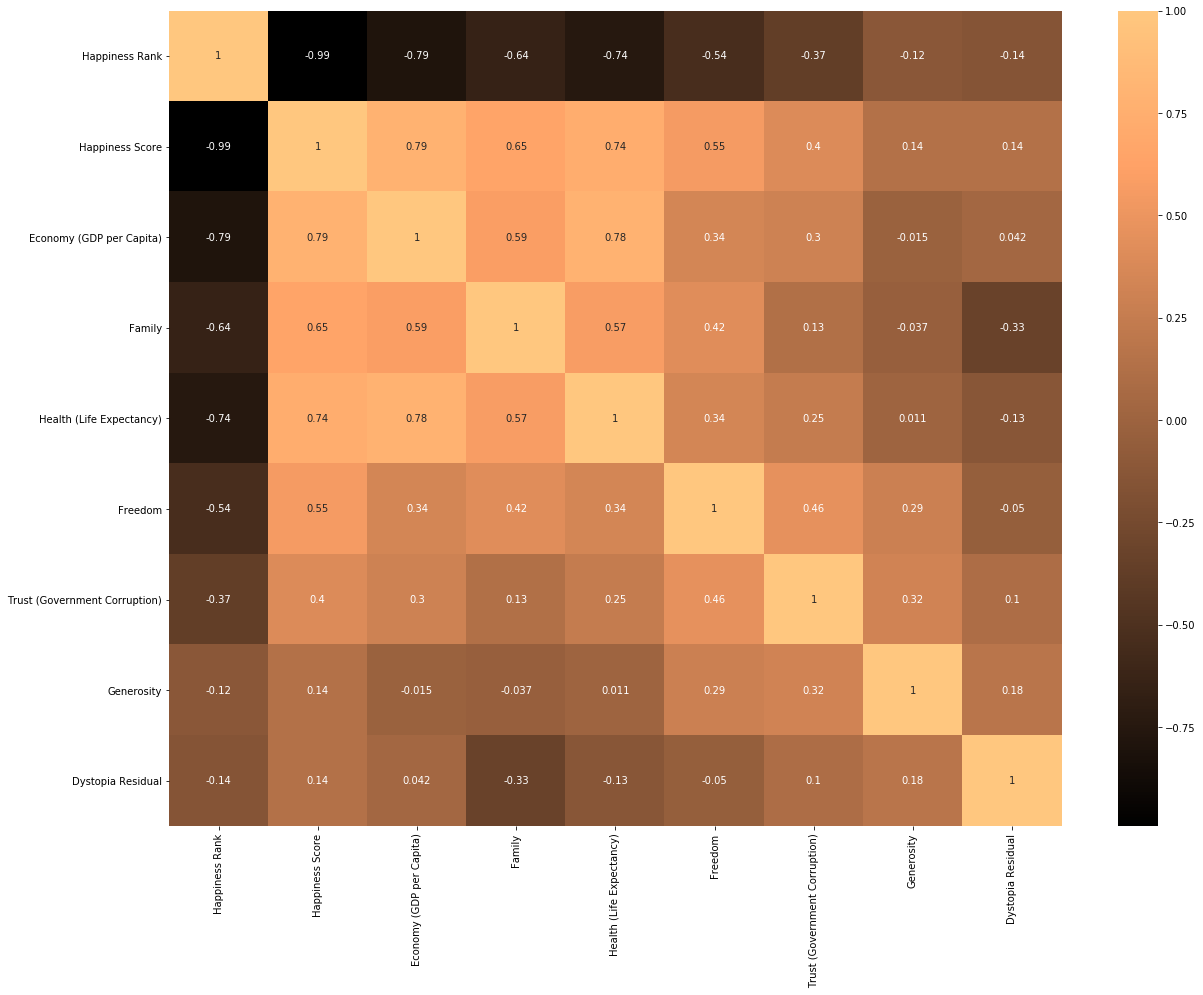

In [15]:
plt.rcParams['figure.figsize'] = (20, 15)
df_corr = merged.corr() # gets the r-value (correlation) between the features, to see what features correlate most with others
ax = sns.heatmap(df_corr, cmap='copper',annot=True) # creates a heatmap
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

Last, I am going to save the cleaned data into our data folder so we can access it in future weeks.

In [16]:
merged.loc[merged['Year'] == '2015']

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
154,Benin,Sub-Saharan Africa,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
155,Syria,Middle East and Northern Africa,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015
156,Burundi,Sub-Saharan Africa,157,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,2015


In [17]:
merged.to_csv('./data/cleaned_WHR_data.csv')
merged

,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,Sub-Saharan Africa,152,3.334,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,0.00000,2019
152,Tanzania,Sub-Saharan Africa,153,3.231,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,0.00000,2019
153,Afghanistan,Southern Asia,154,3.203,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,0.00000,2019
154,Central African Republic,Sub-Saharan Africa,155,3.083,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,0.00000,2019


### Discussion! 
Cool, cool cool cool. (This is a Community reference, and if you get it, you are very cool) Now that we have finished this week's content, I want to ask you: what do you think the correlation matrix above shows? We will notice when we do Correlation Matrices for specific regions in a future week that the values change drastically based on what region we are in, based on their cultural and societal values. Pretty neat, huh? 

Again, I want to stress that if you feel the pace is too fast/too slow, or if you're bored or anything, please please let me know via Slack DM. I truly appreciate any and all feedback, and I want to do my best to make this a fun experience for you guys, so seriously. Roast the shit out of me if you must, because my goal is for y'all to enjoy it : )